# Data Analysis of historical Ethereum dataset

## Preparation

In [63]:
#import necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
#read in the data

eth_his = pd.read_csv('ETH_day.csv')
eth_his.head()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2020-04-15,ETHUSD,158.61,158.61,158.61,158.61,0.00,0.00
1,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44
2,2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28
3,2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05
4,2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57


## General Information

In [65]:
#shape of dataframe

eth_his.shape

(1438, 8)

In [66]:
#generaly description of the dataset

eth_his.describe()

,Open,High,Low,Close,Volume ETH,Volume USD
count,1438.000000,1438.000000,1438.000000,1438.000000,1.438000e+03,1.438000e+03
mean,239.397149,248.919200,227.681446,239.468011,3.720638e+04,1.139557e+07
std,237.662224,248.677428,222.794938,237.606382,6.908336e+04,2.143780e+07
min,6.770000,7.290000,5.990000,6.770000,0.000000e+00,0.000000e+00
25%,79.782500,84.875000,74.677500,80.732500,7.020215e+03,7.541171e+05
50%,181.430000,187.020000,175.850000,181.430000,1.780439e+04,3.221372e+06
75%,297.735000,306.015000,287.427500,297.502500,4.204451e+04,1.204918e+07
max,1381.850000,1420.010000,1270.000000,1381.850000,1.827755e+06,2.221193e+08


In [67]:
#general information about the dataset

eth_his.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1438 non-null   object 
 1   Symbol      1438 non-null   object 
 2   Open        1438 non-null   float64
 3   High        1438 non-null   float64
 4   Low         1438 non-null   float64
 5   Close       1438 non-null   float64
 6   Volume ETH  1438 non-null   float64
 7   Volume USD  1438 non-null   float64
dtypes: float64(6), object(2)
memory usage: 90.0+ KB


## Clean the data

In [68]:
#transform date column as datetime type

eth_his['Date'] = pd.to_datetime(eth_his.Date)
eth_his.Date.head()

0   2020-04-15
1   2020-04-14
2   2020-04-13
3   2020-04-12
4   2020-04-11
Name: Date, dtype: datetime64[ns]

In [69]:
eth_his = eth_his.set_index(['Date'])

In [70]:
eth_his

,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
Date,,,,,,,
2020-04-15,ETHUSD,158.61,158.61,158.61,158.61,0.00,0.00
2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44
2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28
2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05
2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57
...,...,...,...,...,...,...,...
2016-05-13,ETHUSD,10.20,11.59,10.20,10.69,1769.71,18923.55
2016-05-12,ETHUSD,10.43,12.00,9.92,10.20,2072.56,22183.39
2016-05-11,ETHUSD,9.68,10.47,9.68,10.43,3052.51,30978.11


In [71]:
#check how many unique values are in the 'Symbol' column

eth_his['Symbol'].nunique()

1

In [72]:
#drop 'Symbol' column

del eth_his['Symbol']
eth_his

,Open,High,Low,Close,Volume ETH,Volume USD
Date,,,,,,
2020-04-15,158.61,158.61,158.61,158.61,0.00,0.00
2020-04-14,156.97,162.15,155.74,158.61,18061.58,2872210.44
2020-04-13,158.56,159.51,150.12,156.97,15698.32,2416728.28
2020-04-12,158.66,165.37,155.21,158.56,12877.33,2082804.05
2020-04-11,158.26,161.49,154.25,158.66,13761.72,2172914.57
...,...,...,...,...,...,...
2016-05-13,10.20,11.59,10.20,10.69,1769.71,18923.55
2016-05-12,10.43,12.00,9.92,10.20,2072.56,22183.39
2016-05-11,9.68,10.47,9.68,10.43,3052.51,30978.11


In [73]:
#find out about missing values

eth_his.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume ETH    0
Volume USD    0
dtype: int64

### no missing values, so no cleaning etc. needed

In [74]:
#Check for duplicates

eth_his.duplicated().sum()

0

In [75]:
#change order of dataframe (oldest first)

eth_his = eth_his.iloc[::-1]
eth_his.head()

,Open,High,Low,Close,Volume ETH,Volume USD
Date,,,,,,
2016-05-09,12.00,12.00,9.36,9.98,1317.90,12885.06
2016-05-10,9.98,9.98,9.36,9.68,672.06,6578.20
2016-05-11,9.68,10.47,9.68,10.43,3052.51,30978.11
2016-05-12,10.43,12.00,9.92,10.20,2072.56,22183.39
2016-05-13,10.20,11.59,10.20,10.69,1769.71,18923.55


## Analyze the data

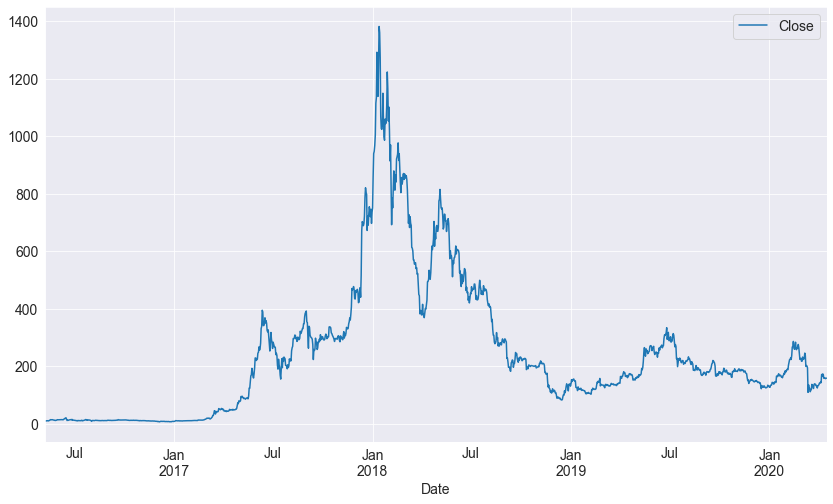

In [76]:
#historical view of Ethereum closing prices

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (14, 8)

eth_his.Close.plot(legend=True);

In [77]:
#compute rolling averages of closing prices

eth_his['Moving average 40 days'] = eth_his.iloc[:,3].rolling(window=40).mean()

c:\Projects\Data Analysis\venv\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


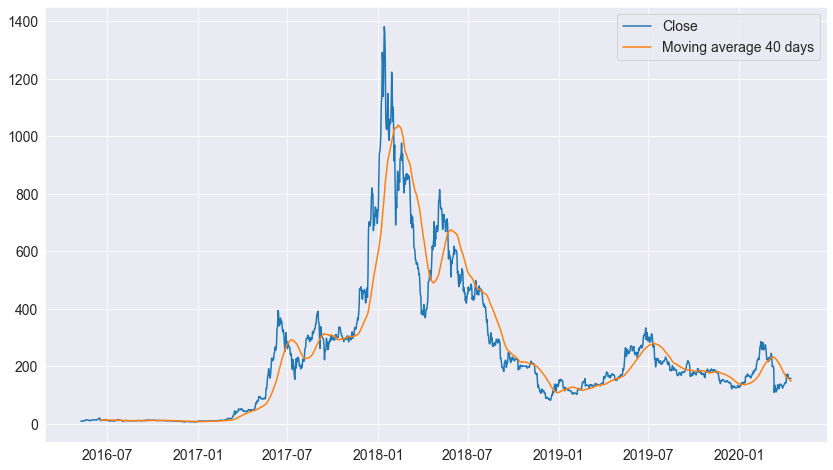

In [103]:
plt.plot(eth_his.Close);
plt.plot(eth_his['Moving average 40 days']);

plt.legend(['Close', 'Moving average 40 days']);

In [79]:
#date with highest ever value

eth_his.High.idxmax()

Timestamp('2018-01-13 00:00:00')

In [80]:
#date with lowest ever value

eth_his.Low.idxmin()

Timestamp('2016-12-06 00:00:00')

In [81]:
#number of days with closing prices over 1000

len(eth_his[eth_his.Close > 1000])

25

In [82]:
#week with maximum difference between high and low

eth_High_week = pd.DataFrame(eth_his.High.resample('W').max())
eth_Low_week = pd.DataFrame(eth_his.Low.resample('W').min())
eth_week = pd.concat([eth_High_week, eth_Low_week], axis=1)

time_max_weekly_diff = (eth_week.High - eth_week.Low).idxmax()

max_weekly_diff = (eth_week.High - eth_week.Low).max()

print('The week with highest difference between weekly high and weekly low was at', time_max_weekly_diff, 'and it was', max_weekly_diff, '$.')



The week with highest difference between weekly high and weekly low was at 2018-01-21 00:00:00 and it was 619.91 $.


In [83]:
#month with maximum difference between high and low

eth_High_month = pd.DataFrame(eth_his.High.resample('M').max())
eth_Low_month = pd.DataFrame(eth_his.Low.resample('M').min())
eth_month = pd.concat([eth_High_month, eth_Low_month], axis=1)

time_max_monthly_diff = (eth_month.High - eth_month.Low).idxmax()

max_monthly_diff = (eth_month.High - eth_month.Low).max()

print('The month with highest difference between weekly high and weekly low was at', time_max_monthly_diff, ' and it was', max_monthly_diff, '$.')


The month with highest difference between weekly high and weekly low was at 2018-01-31 00:00:00  and it was 701.01 $.


c:\Projects\Data Analysis\venv\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


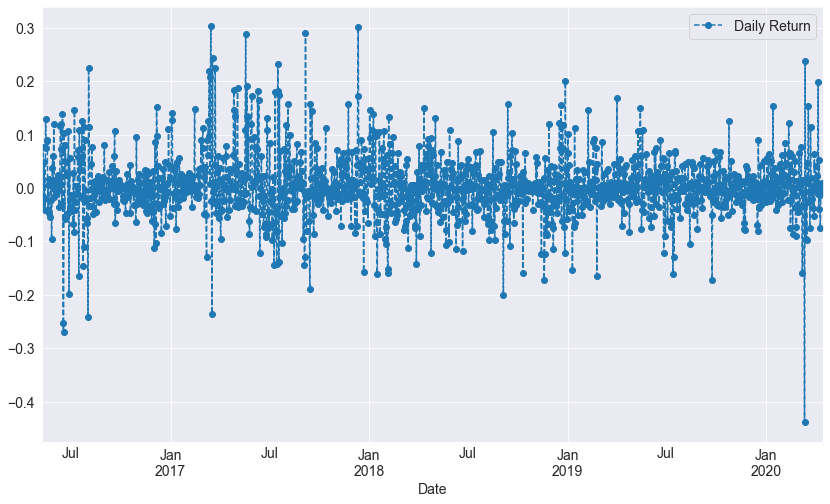

In [101]:
#percent change for each day

eth_his['Daily Return'] = eth_his.Close.pct_change()
eth_his['Daily Return'].plot(legend=True,linestyle='--',marker='o');

c:\Projects\Data Analysis\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


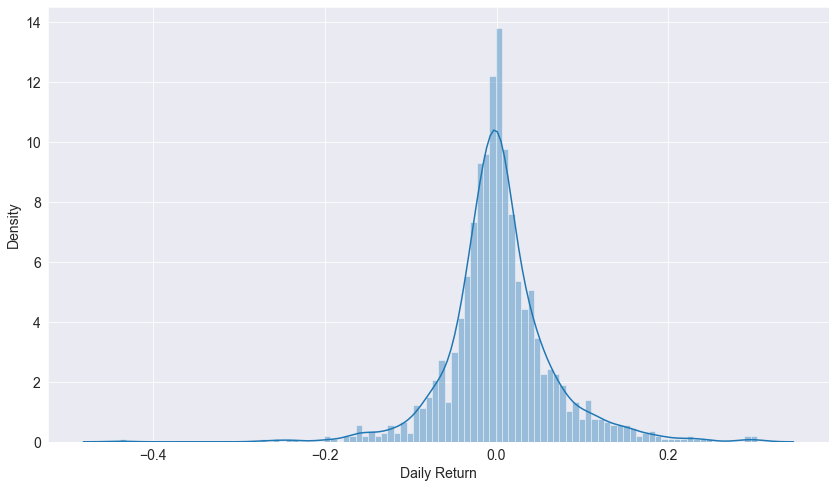

In [100]:
#histogram with the average daily return of Ethereum

sns.distplot(eth_his['Daily Return'], bins=100);

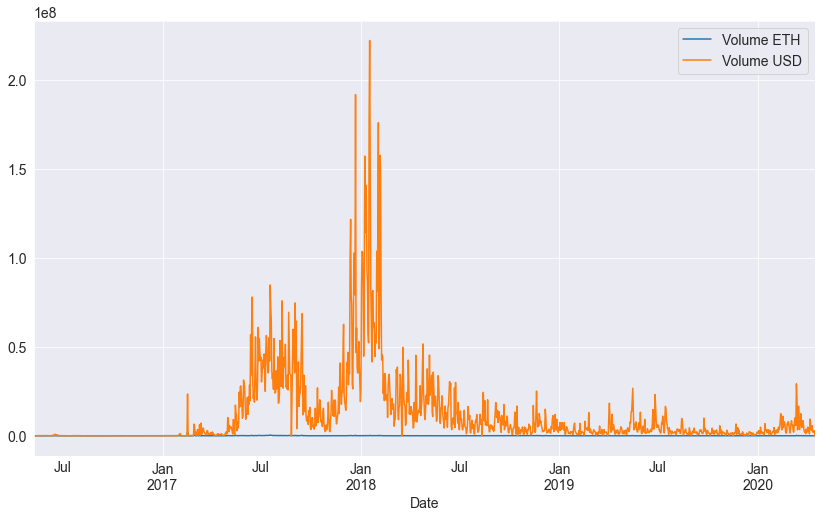

In [105]:
#historical view of the volume of Ethereum in ETH and USD

eth_his[['Volume ETH', 'Volume USD']].plot(subplots=False);

### there is no problem with the plot. The ETH Volume is just way smaller than the USD Volume

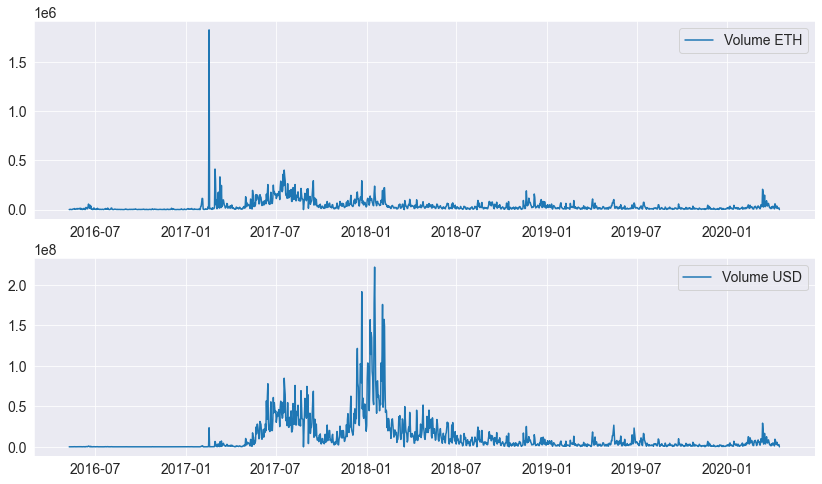

In [112]:
fig, axs = plt.subplots(2)
axs[0].plot(eth_his['Volume ETH']);
axs[0].legend(['Volume ETH']);
axs[1].plot(eth_his['Volume USD']);
axs[1].legend(['Volume USD']);

### the dimensions of the y-axis show that the USD Volume has much higher values